In [1]:
import sys, time, wmi, psutil
SYSTEM_INFO = wmi.WMI().Win32_OperatingSystem()[0]
"system: {0}, {1}, {2}".format(SYSTEM_INFO.Caption, SYSTEM_INFO.BuildNumber, SYSTEM_INFO.OSArchitecture) 
"memory: {}G".format(round(psutil.virtual_memory().total / 1024**3, 2))
"cpu: {}".format(psutil.cpu_count())
"python: {}".format(sys.version)
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))

'system: Microsoft Windows 10 教育版, 18362, 64 位'

'memory: 15.86G'

'cpu: 4'

'python: 3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]'

'2020-03-15 00:07:00'

- **@author**: run_walker
- **@references**:
    1. [mlxtend.evaluate.confusion_matrix](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/) 解释了confusion_matrix的含义。
    2. [mlxtend.plotting.plot_confusion_matrix](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/)

In [3]:
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

?sklearn_confusion_matrix

Signature:
sklearn_confusion_matrix(
    y_true,
    y_pred,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    I

In [4]:
from mlxtend.evaluate import confusion_matrix as mlxtend_confusion_matrix

?mlxtend_confusion_matrix

Signature:
mlxtend_confusion_matrix(
    y_target,
    y_predicted,
    binary=False,
    positive_label=1,
)
Docstring:
Compute a confusion matrix/contingency table.

Parameters
-----------
y_target : array-like, shape=[n_samples]
    True class labels.
y_predicted : array-like, shape=[n_samples]
    Predicted class labels.
binary : bool (default: False)
    Maps a multi-class problem onto a
    binary confusion matrix, where
    the positive class is 1 and
    all other classes are 0.
positive_label : int (default: 1)
    Class label of the positive class.

Returns
----------
mat : array-like, shape=[n_classes, n_classes]

Examples
-----------
For usage examples, please see
http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/
File:      d:\anaconda3\envs\python37\lib\site-packages\mlxtend\evaluate\confusion_matrix.py
Type:      function


In [5]:
from mlxtend.plotting import plot_confusion_matrix

?plot_confusion_matrix

Signature:
plot_confusion_matrix(
    conf_mat,
    hide_spines=False,
    hide_ticks=False,
    figsize=None,
    cmap=None,
    colorbar=False,
    show_absolute=True,
    show_normed=False,
    class_names=None,
)
Docstring:
Plot a confusion matrix via matplotlib.
Parameters
-----------
conf_mat : array-like, shape = [n_classes, n_classes]
    Confusion matrix from evaluate.confusion matrix.
hide_spines : bool (default: False)
    Hides axis spines if True.
hide_ticks : bool (default: False)
    Hides axis ticks if True
figsize : tuple (default: (2.5, 2.5))
    Height and width of the figure
cmap : matplotlib colormap (default: `None`)
    Uses matplotlib.pyplot.cm.Blues if `None`
colorbar : bool (default: False)
    Shows a colorbar if True
show_absolute : bool (default: True)
    Shows absolute confusion matrix coefficients if True.
    At least one of  `show_absolute` or `show_normed`
    must be True.
show_normed : bool (default: False)
    Shows normed confusion matrix coeffici

# Binary Classification

In [20]:
y_target =    [0, 0, 1, 0, 0, 1, 1, 1]
y_predicted = [1, 0, 1, 0, 0, 0, 0, 1]

In [21]:
sklearn_cm = sklearn_confusion_matrix(y_target, y_predicted)
sklearn_cm

array([[3, 1],
       [2, 2]], dtype=int64)

In [22]:
mlxtend_cm = mlxtend_confusion_matrix(y_target, y_predicted)
mlxtend_cm

array([[3, 1],
       [2, 2]])

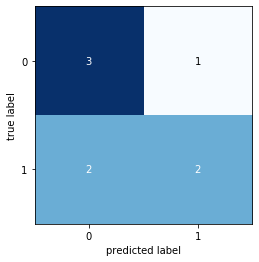

In [23]:
plot_confusion_matrix(mlxtend_cm);

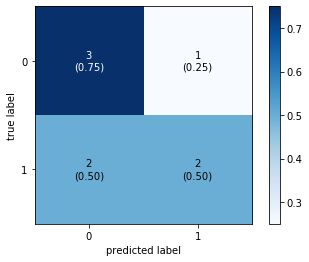

In [24]:
plot_confusion_matrix(mlxtend_cm, 
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True);

# Multi-class Classification

In [25]:
y_target =    [1, 1, 1, 0, 0, 2, 0, 3]
y_predicted = [1, 0, 1, 0, 0, 2, 1, 3]

In [26]:
sklearn_cm = sklearn_confusion_matrix(y_target, y_predicted)
sklearn_cm

array([[2, 1, 0, 0],
       [1, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [27]:
mlxtend_cm = mlxtend_confusion_matrix(y_target, y_predicted)
mlxtend_cm

array([[2, 1, 0, 0],
       [1, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

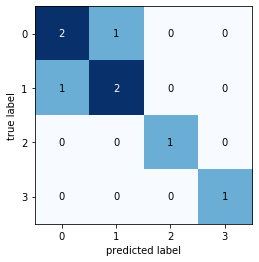

In [28]:
plot_confusion_matrix(mlxtend_cm);

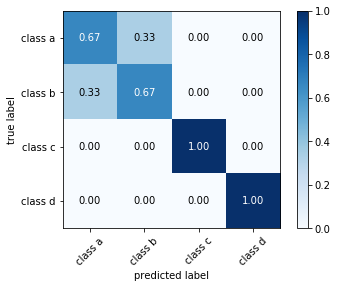

In [29]:
# 0, 1, 2, 3 -> class_names
class_names = ['class a', 'class b', 'class c', 'class d']
plot_confusion_matrix(mlxtend_cm,
                      colorbar=True,
                      show_absolute=False,
                      show_normed=True,
                      class_names=class_names);

# Multi-class to Binary

In [17]:
y_target =    [1, 1, 1, 0, 0, 2, 0, 3]
y_predicted = [1, 0, 1, 0, 0, 2, 1, 3]

In [18]:
mlxtend_cm = mlxtend_confusion_matrix(y_target, y_predicted,
                                      binary=True)
mlxtend_cm # 默认1->1, others->0

array([[4, 1],
       [1, 2]])

In [19]:
mlxtend_confusion_matrix(
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 1, 0]
)

array([[4, 1],
       [1, 2]])